<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/Tarea_20_Ejercicios_de_Normalizacion_RESUELTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
 - La distribución de los datos no es alterada con la normalización Min-Max, esta solo ajusta los datos a un rango específico. Así que, aunque los valores se transformen, la distribución se mantiene prácticamente igual.
2. ¿Qué interpretas del p-valor antes y después de la normalización?
 - El p-valor no cambió significativamente, si es que no cambió en absoluto (en este caso se redondeó y se ve igual) después de realizar la normalización. Esto es porque no se modifica la distribución con la normalización Min-Max y la prueba Shapiro-Wilk sigue detectando que los datos siguen la misma distribución anormal.


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

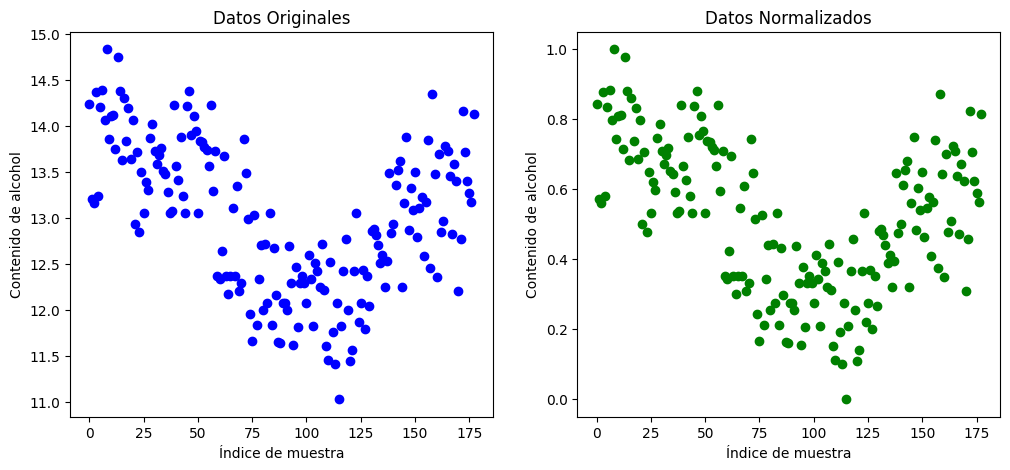

In [192]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt

# Cargamos el dataset wine
vino = load_wine(as_frame=True) # as_frame=True manda los datos como un DataFrame
df = vino.frame # solo es necesario vino.frame si as_frame=True

# # Otra opcion para cargar el dataset es
# vino = load_wine() # por defecto as_frame=False
# # feature_names es el nombre columnas ya que as_frame=False no las muestra
# df = pd.DataFrame(vino.data, columns=vino.feature_names)

print(df.head())
print(df.info())

# Seleccionamos una de las caracteristicas numericas
alcohol = df['alcohol']

# Prueba de normalidad Shapiro-Wilk
def shapiro_test(data):
  shapiro_test = stats.shapiro(data) # sin la respuesta a la vida, el universo y todo lo demas
  print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
  if shapiro_test.pvalue > 0.05:
      print("Los datos siguen una distribución normal.")
  else:
      print("Los datos NO siguen una distribución normal.")

# Graficación
def graficar(dato, dato_norm, etiqueta):
  # Graficas de los datos originales y normalizados
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.scatter(range(len(dato)), dato, color='blue', label="Original")
  plt.title("Datos Originales")
  plt.xlabel("Índice de muestra")
  plt.ylabel(f"Contenido de {etiqueta}")

  plt.subplot(1, 2, 2)
  plt.scatter(range(len(dato_norm)), dato_norm, color='green', label="Min-Max Scaling")
  plt.title("Datos Normalizados")
  plt.xlabel("Índice de muestra")
  plt.ylabel(f"Contenido de {etiqueta}")

  plt.show()


print('Prueba de normalidad sobre los datos originales')
shapiro_test(alcohol)

# Normalizacion Min-Max aplicada a alcohol
# scaler = MinMaxScaler(feature_range=(0, 1))
# # reshape para transformar valores a el numero de files necesario (-1) con 1 sola columna (1)
# alcohol_scaled = scaler.fit_transform(alcohol.values.reshape(-1, 1))

# Normalizacion Min-Max aplicada a alcohol con fórmula
alcohol_normalizado = (alcohol - alcohol.min()) / (alcohol.max() - alcohol.min())

print('Datos originales\n', alcohol)
# print('Datos normalizados\n', alcohol_scaled)
print('Datos normalizados con fórmula\n', alcohol_normalizado)

print('\nPrueba de normalidad sobre los datos normalizados')
shapiro_test(alcohol_normalizado)

graficar(alcohol, alcohol_normalizado, 'alcohol')

# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?
 - Al igual que la normalización Min-Max, la forma de la distribución se mantiene igual, solo siendo diferentes la escala y la transformación de la media y desviación estándar a 0 y 1 respectivamente.
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?
 - Se pueden comparar más fácilmente las variables transformadas con otras que pueden estar en diferente escala, ya que las variables se estándarizan. Estos es útil en modelos como Regresión Lineal, PCA y SVM que necsitan escalas balanceadas. Sin embargo, esta normalización solo funciona bien para datos con distribuciones normales, que en este ejercicio y dataset, la distribución no es normal.



   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

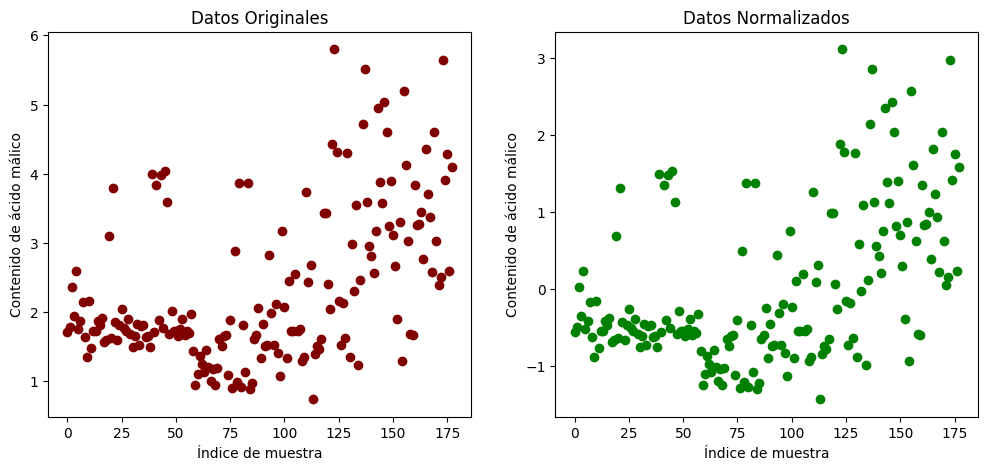

In [77]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

# Cargamos el dataset wine
vino = load_wine(as_frame=True) # as_frame=True manda los datos como un DataFrame
df = vino.frame # solo es necesario vino.frame si as_frame=True

print(df.head())
print(df.info())

# Seleccionamos una de las caracteristicas numericas
malic_acid = df['malic_acid']

# Prueba de normalidad Shapiro-Wilk
def shapiro_test(data):
  shapiro_test = stats.shapiro(data) # sin la respuesta a la vida, el universo y todo lo demas
  print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
  if shapiro_test.pvalue > 0.05:
      print("Los datos siguen una distribución normal.")
  else:
      print("Los datos NO siguen una distribución normal.")

# Graficación
def graficar(dato, dato_norm, etiqueta):
  # Graficas de los datos originales y normalizados
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.scatter(range(len(dato)), dato, color='maroon', label="Original")
  plt.title("Datos Originales")
  plt.xlabel("Índice de muestra")
  plt.ylabel(f"Contenido de {etiqueta}")

  plt.subplot(1, 2, 2)
  plt.scatter(range(len(dato_norm)), dato_norm, color='green', label="Min-Max Scaling")
  plt.title("Datos Normalizados")
  plt.xlabel("Índice de muestra")
  plt.ylabel(f"Contenido de {etiqueta}")

  plt.show()


print('Prueba de normalidad sobre los datos originales')
shapiro_test(malic_acid)

# Normalizacion Z-Score aplicada a malic_acid
scaler = StandardScaler()
# reshape para transformar valores a el numero de files necesario (-1) con 1 sola columna (1)
malic_acid_scaled = scaler.fit_transform(malic_acid.values.reshape(-1, 1))

# Normalizacion Z-Score aplicada a malic_acid con fórmula
malic_acid_normalizado = (malic_acid - malic_acid.mean()) / malic_acid.std()

print('Datos originales\n', malic_acid.head())
print('Datos normalizados\n', malic_acid_scaled[:5])
print('Datos normalizados con fórmula\n', malic_acid_normalizado.head())

print('\nPrueba de normalidad sobre los datos normalizados')
shapiro_test(malic_acid_scaled)

graficar(malic_acid, malic_acid_scaled, 'ácido málico')

Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación logarítmica a la distribución de los datos?
 - En este caso la distribución si es afectada, observando que de un comportamiento exponecial, se transformó a uno lineal con un(os) outlier que le afectan, pero en sí el sesgo se reduce y los valores se ven agrupoas de una manera lineal, como se mencionó anteriormente.
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?
 - La prueba antes y después de la transformación muestra un valor muy bajo, tanto que se quitó el redondeo. Este valor bajo significa que los datos no tienen una distribucion normal ni antes ni después de la transformación. Cabe mencionar que si se utiliza una muestra mas pequeña (```x = np.linspace(1, 10, 10)```) si existe la posibilidad que la distribución sea normal después de la transfromación.


Prueba de normalidad sobre los datos originales
Shapiro-Wilk Test: p-valor = 7.143389085202236e-10
Los datos NO siguen una distribución normal.

Datos originales
 [4.13229204 1.03407097 5.04407184 9.50474639 0.80670299]
Datos transformados
 [2.37227104 2.03123466 2.45388834 2.778457   2.00095622]

Prueba de normalidad sobre los datos transformados
Shapiro-Wilk Test: p-valor = 6.4694851067049835e-19
Los datos NO siguen una distribución normal.


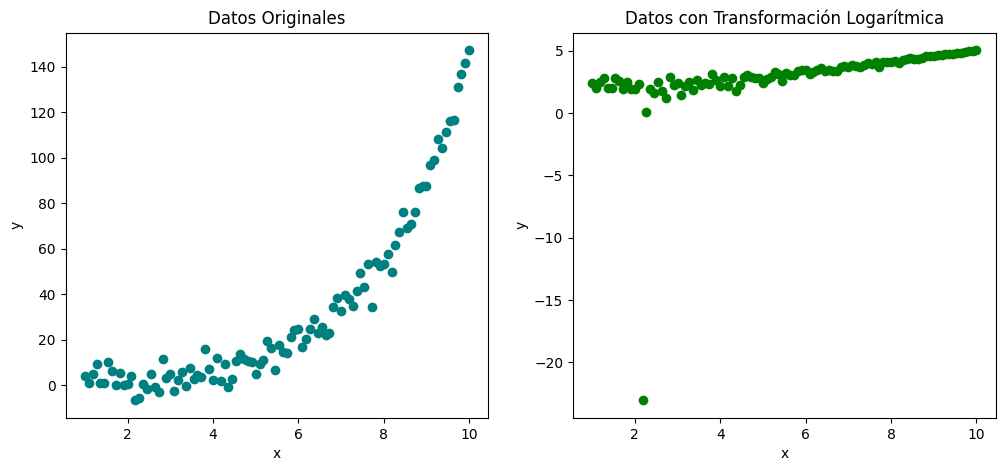

In [179]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Se genera un conjunto de datos aleatorios con numpy
np.random.seed(42)
x = np.linspace(1, 10, 100)
y = np.exp(0.5 * x) + np.random.normal(scale=5, size=x.shape) # Pueden salir 0 o negativo

# Verificamos el valor mínimo de y (si es 0 o negativo)
min_y = y.min()
if min_y <= 0:
    c = abs(min_y) + 1e-10
else:
    c = 0

# Prueba de normalidad Shapiro-Wilk
def shapiro_test(data):
  shapiro_test = stats.shapiro(data) # sin la respuesta a la vida, el universo y todo lo demas
  print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue}")
  if shapiro_test.pvalue > 0.05:
      print("Los datos siguen una distribución normal.")
  else:
      print("Los datos NO siguen una distribución normal.")

# Graficación
def graficar(x, y, y_norm, etiqueta):
  # Graficas de los datos originales y normalizados
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.scatter(x, y, color='teal', label="Original")
  plt.title("Datos Originales")
  plt.xlabel("x")
  plt.ylabel(f"{etiqueta}")

  plt.subplot(1, 2, 2)
  plt.scatter(x, y_norm, color='green', label="Min-Max Scaling")
  plt.title(f"Datos con Transformación Logarítmica")
  plt.xlabel("x")
  plt.ylabel(f"{etiqueta}")

  plt.show()

# Prueba Shapiro-Wilk sobre datos originales
print('Prueba de normalidad sobre los datos originales')
shapiro_test(y)

# Transformación Logarítmica
# Aplicamos la transformación previa (y+c) dentro de la logaritmica
y_log = np.log(y + c)

print('\nDatos originales\n', y[:5])
print('Datos transformados\n', y_log[:5])

# Prueba Shapiro-Wilk sobre datos transformados
print('\nPrueba de normalidad sobre los datos transformados')
shapiro_test(y_log)

graficar(x, y, y_log, 'y')

Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
 - La transformación ayudó a que mi muestra de 100 números aleatorios pasara la prueba de Shapiro-Wilk despues de la transformación, esto significa que los datos pueden considerarse aproximadamente normales.
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?
 - La transformación raíz cuadrada comprime los valores mas grandes y esto ayuda a que los valores atípicos no tengan un impacto muy grande, ayudando a tener una dispersión mas controlada y lograr que haya simetría en la distribución.


Prueba de normalidad sobre los datos originales
Shapiro-Wilk Test: p-valor = 2.5492708974804183e-08
Los datos NO siguen una distribución normal.

Datos originales
 [0.20497183 0.49699723 0.03435517 0.24142601 0.04552282]
Datos transformados
 [0.45273814 0.7049803  0.18535148 0.49135121 0.21336077]

Prueba de normalidad sobre los datos transformados
Shapiro-Wilk Test: p-valor = 0.09360285013375615
Los datos siguen una distribución normal.


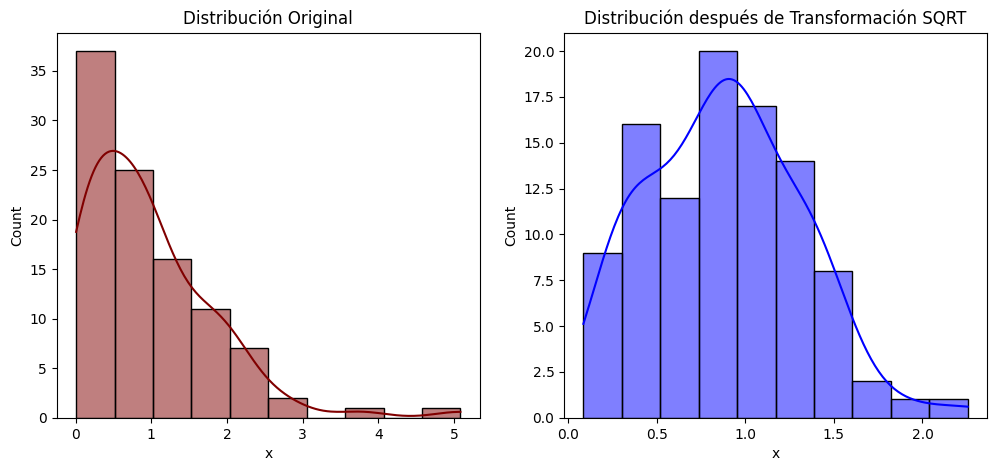

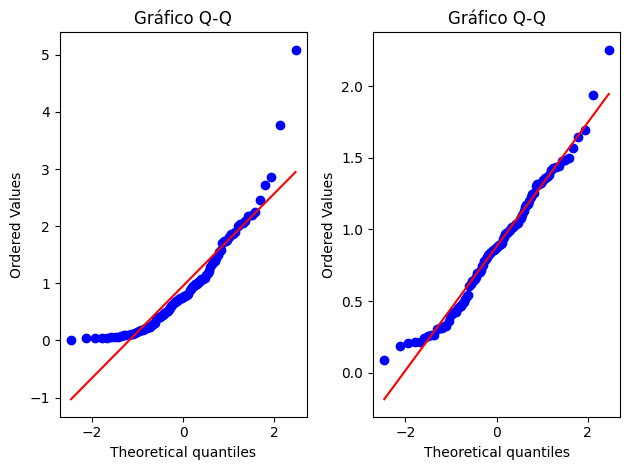

In [238]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# datos aleatorios sesgados a la derecha
np.random.seed()
x = np.random.exponential(scale=1.0, size=100)

# Prueba de normalidad Shapiro-Wilk
def shapiro_test(data):
  shapiro_test = stats.shapiro(data) # sin la respuesta a la vida, el universo y todo lo demas
  print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue}")
  if shapiro_test.pvalue > 0.05:
      print("Los datos siguen una distribución normal.")
  else:
      print("Los datos NO siguen una distribución normal.")

# Graficación
def graficar(x, x_norm):
  # Graficas de los datos originales y normalizados
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(x, bins=10, kde=True, color='maroon')
  plt.title("Distribución Original")
  plt.xlabel("x")

  plt.subplot(1, 2, 2)
  sns.histplot(x_norm, bins=10, kde=True, color='blue')
  plt.title("Distribución después de Transformación SQRT")
  plt.xlabel("x")

  plt.show()

# Prueba Shapiro-Wilk sobre datos originales
print('Prueba de normalidad sobre los datos originales')
shapiro_test(x)

# Transformación Raíz Cuadrada
x_sqrt = np.sqrt(x)

print('\nDatos originales\n', x[:5])
print('Datos transformados\n', x_sqrt[:5])

# Prueba Shapiro-Wilk sobre datos transformados
print('\nPrueba de normalidad sobre los datos transformados')
shapiro_test(x_sqrt)

graficar(x, x_sqrt)

# Verificación extra, para cuando sale distribución normal
plt.subplot(1, 2, 1)
stats.probplot(x, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")

plt.subplot(1, 2, 2)
stats.probplot(x_sqrt, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")

plt.tight_layout()
plt.show()

Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
 - Antes de la transformación se puede ver claramente el sesgo en los datos y en la prueba el p-valor es muy bajo, comprobando que no es una distribución normal. Después de la transformación, se redujo este sesgo de manera significativa y el p-valor es mayor que 0.05 lo que significa que pasa la prueba y los datos tienen una distribución normal.
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?
 - Es el parámetro clave para la transformación BoxCox ya que es el determinante del tipo de transformación que se va a aplicar. En este caso fue 0.26 lo que significa que se acerca a 0 y se va a aplicar la transformación logarítmica.


Prueba de normalidad sobre los datos originales
Shapiro-Wilk Test: p-valor = 2.669404612960744e-32
Los datos NO siguen una distribución normal.

Datos originales
 [0.20704453 3.74677592 1.08070961 3.69377394 1.23091837]
Datos transformados
 [-1.29568976  1.57210401  0.07839533  1.55215093  0.21339352]

Prueba de normalidad sobre los datos transformados
Shapiro-Wilk Test: p-valor = 0.11478035926061897
Los datos siguen una distribución normal.


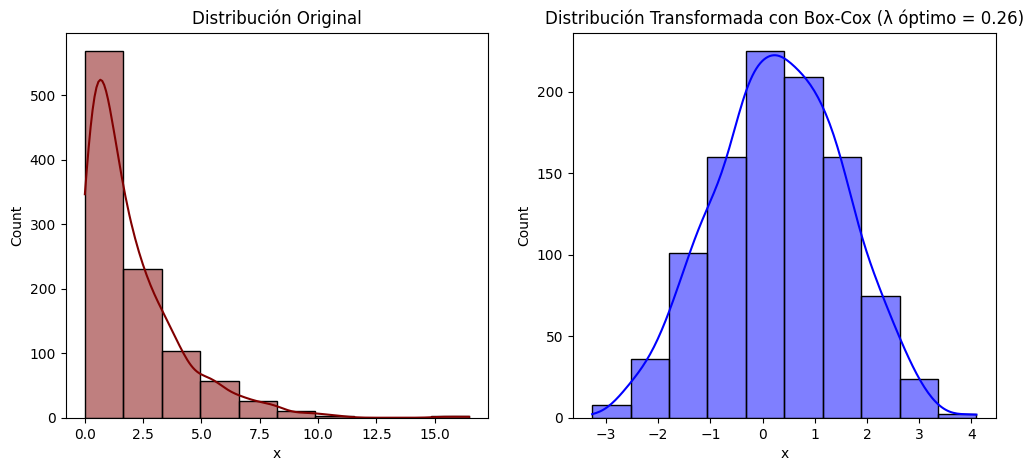

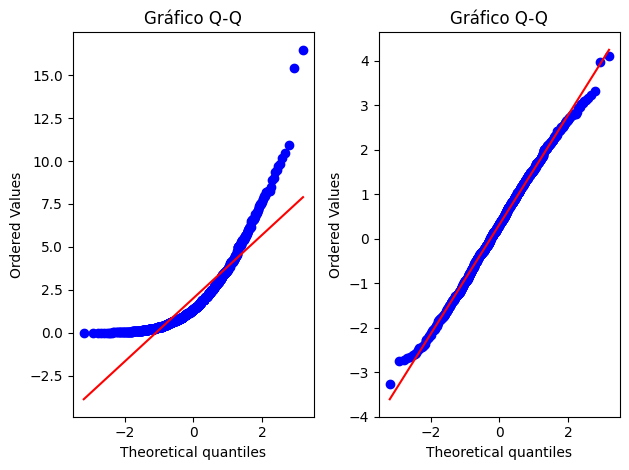

In [243]:
import numpy as np
from scipy.stats import boxcox
import seaborn as sns

# datos aleatorios sesgados a la derecha
np.random.seed()
x = np.random.exponential(scale=2, size=1000)

# Prueba de normalidad Shapiro-Wilk
def shapiro_test(data):
  shapiro_test = stats.shapiro(data) # sin la respuesta a la vida, el universo y todo lo demas
  print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue}")
  if shapiro_test.pvalue > 0.05:
      print("Los datos siguen una distribución normal.")
  else:
      print("Los datos NO siguen una distribución normal.")

# Graficación
def graficar(x, x_norm, lambda_optimo):
  # Graficas de los datos originales y normalizados
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(x, bins=10, kde=True, color='maroon')
  plt.title("Distribución Original")
  plt.xlabel("x")

  plt.subplot(1, 2, 2)
  sns.histplot(x_norm, bins=10, kde=True, color='blue')
  plt.title(f"Distribución Transformada con Box-Cox (λ óptimo = {lambda_optimo:.2f})")
  plt.xlabel("x")

  plt.show()

# Prueba Shapiro-Wilk sobre datos originales
print('Prueba de normalidad sobre los datos originales')
shapiro_test(x)

# Transformación Raíz Cuadrada
x_boxcox, lambda_opt = boxcox(x)

print('\nDatos originales\n', x[:5])
print('Datos transformados\n', x_boxcox[:5])

# Prueba Shapiro-Wilk sobre datos transformados
print('\nPrueba de normalidad sobre los datos transformados')
shapiro_test(x_boxcox)

graficar(x, x_boxcox, lambda_opt)

# Verificación extra, para cuando sale distribución normal
plt.subplot(1, 2, 1)
stats.probplot(x, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")

plt.subplot(1, 2, 2)
stats.probplot(x_boxcox, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")

plt.tight_layout()
plt.show()